<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, Булат! Ты здорово поработал над комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)
    
P.S. только обрати внимание на комментарий по корреляции

<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделала большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Объёмная и творческая аналитическая задача, тем интереснее будет с ней справиться! </div>

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

0

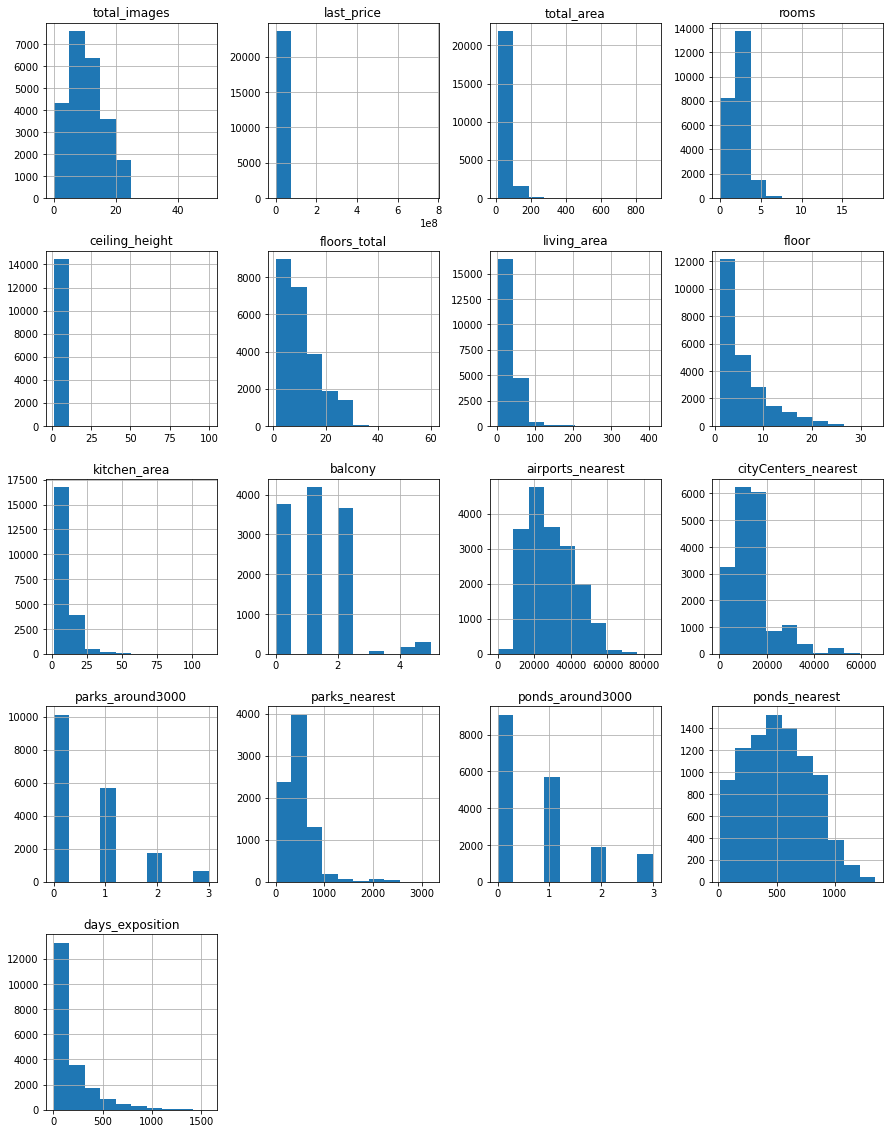

In [37]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('/datasets/real_estate_data.csv', encoding='utf-8', sep='	')
print(data.info())
print(data.hist(figsize=(15,20)))
data.duplicated().sum()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошее начало, так держать. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но все же перед началом проведения исследования стоит всегда на всякий случай проверять данные на наличие явных дубликатов, чтобы не обрабатывать заведомо некорректные данные

<div class="alert alert-info"> <b>Комментарий студента:</b> Поменял, в прошлы раз было на 2-м шаге.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично!

### Предобработка данных

In [38]:
data['balcony'] = data['balcony'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(1)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Согласен с такими вариантами заполнения, отлично

Для начало выведем и найдём все пропуски. Затем начинаем заменять пропуски:
- В категории "балконы" скорее всего нет балкона
- В категории "Количество этажей скорее всего равно 1
- В категории "Количество парков" и "Количество прудов" тоже скорее всего нет

Остальные не могут быть заменены, так как:
- "высота потолка" и "жилая площадь" и "площадь кухни" - продавцы не знают какой размер или не измеряли
- "аппартаменты" и "ближайший аэропорт" и "дальность аэропорта/парка/пруда" - не знают
- "название города" - не указали
- "days_exposition" - не убрали анкету

Отлично дупликатов не обнаружено!

In [39]:
for i in data:
    print(f'{i} -> {data[i].dtype}')
#first_day_exposition ne data +
#floors_total ne int +
#is_apartment  ne bull +
#balcony ne int +
#parks_around3000 ne int +
#ponds_around3000 ne int +

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = data['floors_total'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

total_images -> int64
last_price -> float64
total_area -> float64
first_day_exposition -> object
rooms -> int64
ceiling_height -> float64
floors_total -> float64
living_area -> float64
floor -> int64
is_apartment -> object
studio -> bool
open_plan -> bool
kitchen_area -> float64
balcony -> float64
locality_name -> object
airports_nearest -> float64
cityCenters_nearest -> float64
parks_around3000 -> float64
parks_nearest -> float64
ponds_around3000 -> float64
ponds_nearest -> float64
days_exposition -> float64


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Эти типы данных подойдут им лучше

Изменены слкдующие столбцы:
- "first_day_exposition" на дату
- "floors_total", "balcony", "parks_around3000", "ponds_around3000" на целое
- "is_apartment" на логическое

In [40]:
data['first_name'] = data['locality_name'].copy()

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Для борьбы с warnings могу посоветовать такой прием:
    
import warnings

warnings.filterwarnings("ignore")

<div class="alert alert-info"> <b>Комментарий студента:</b> Поменял в начале</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Ок)

In [41]:
'''print(len(data['locality_name'].unique())) #365

for kol in range(7):
    for i in data['locality_name'].unique():
        if str(type(i)) == "<class 'str'>":
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('посёлок','поселок') #331
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('поселок городского типа','поселок') #330
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('деревня','') #330
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('городской поселок','') #329
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('поселок','') #317
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('село','') #316
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('садовое товарищество','')#314
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('садоводческое некоммерческое товарищество','')#314
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('станции','')#314
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('коттеджный','')#314

            if (i[0] == ' '):
                data['locality_name'].loc[data['locality_name'] == i] = i[1:] #308

            
data['locality_name'] = data['locality_name'].replace('поселок городского типа','поселок')
data['locality_name'].sort_values().unique()'''

'print(len(data[\'locality_name\'].unique())) #365\n\nfor kol in range(7):\n    for i in data[\'locality_name\'].unique():\n        if str(type(i)) == "<class \'str\'>":\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'посёлок\',\'поселок\') #331\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'поселок городского типа\',\'поселок\') #330\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'деревня\',\'\') #330\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'городской поселок\',\'\') #329\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'поселок\',\'\') #317\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'село\',\'\') #316\n            data[\'locality_name\'].loc[data[\'locality_name\'] == i] = i.replace(\'садовое товарищество\',\'\')#314\n            data[\'locality_name\'].lo

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что так детально поработал с неявными дубликатами

Слишком много похожих названий, легче создать новый столбец с оригиналом и оставить здесь только названия (без "село", "пгт" и т.д.)
Для сайта нужно сделать заполнение по картам, чтобы дом привязывался к конкретному адрессу, а не тому, что напишет человек

**P.s. Чтобы код заработал правильно, его нужно запустить 6-7 раз до вывода значения 308, поэтому используется верхний цикл**

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Но ведь проще было бы в таком случае воспользоваться например loc с условием, так и перезапускать ничего не нужно будет)

In [42]:
for i in data['ceiling_height']:
    if i > 15:
        print(i)
        data['ceiling_height'] = data['ceiling_height'].replace(i, i//10)
        
data['ceiling_height'].unique()

25.0
32.0
27.0
24.0
26.0
20.0
22.6
27.5
100.0


array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.  ,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,
        2.66,  2.59,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [43]:
print(data.describe())
print(data['last_price'].min())

data['last_price'].sort_values()
data[data['last_price'] == data['last_price'].min()]['last_price'] = 121900

data.loc[data['last_price']==12190.0]['last_price'] = 121900
data['last_price'].min()

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.728814   
std        5.682529  1.088701e+07     35.654083      1.078405        0.320828   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.510000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000       14.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23699.000000  21796.000000  23699.000000  21421.000000  23699.000000   
mean      10.638719     34.457852      5.892358     10.569807      0.591080   
std        6.610834     22.030445

12190.0

Опять же **человеческая** ошибка, которую будет исправлять другой **человек**...)

In [44]:
data.loc[data['last_price'] == 12190, ['last_price']] = 121900

In [45]:
data['last_price'].min()

121900.0

На 2-м шаге было изменено много ошибок, сделанных в основном людьми:
1) Удалены одинаковые деревни поселки с одним названием

2) Заменены размеры потолков

3) Изменены типы данных

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе "Предобработка данных" было проведено довольно много анализа и работы, все же стоит написать по нему хотя бы короткий вывод
    
Также, обрати внимание, что в данных осталось довольно много аномалий. Посоветую тут вызвать describe по всему датасету и посмотреть на min и max значения в столбцах на адекватность

<div class="alert alert-info"> <b>Комментарий студента:</b> Я не знаю почему но минимальная цена вообще не хочет меняться</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Просто посмотри чуть внимательнее, как правильно указыватся loc. Выше добавил пример, где все работает

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Еще аномалии могут быть не только тут, посмотри например на расстояние до аэропорта или этажности зданий

### Посчитайте и добавьте в таблицу новые столбцы

In [82]:
data['price/metr'] = data['last_price']/data['total_area']
data['week_day'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['km'] = pd.to_numeric(round(data['cityCenters_nearest'] / 1000, 0))

data['type_floor'] = '0'

data['km'] = pd.to_numeric(data['km'], errors='ignore', downcast="integer")
pd.to_numeric(data['km'], errors='ignore', downcast="integer")
data['km'] = data['km'].astype('int', errors='ignore')

#Переводим типы этажей
data['type_floor'].loc[data['floor'] == 1] = 'Первый'
data['type_floor'] = data['type_floor'].where(data['floor'] != data['floors_total'],other='Последний')
data['type_floor'] = data['type_floor'].where(data['type_floor'].isin(['Последний',"Первый"]), other='Другой')
    
print(data['type_floor'].unique())
display(data.head(30))
data
print(data['first_day_exposition'].dt.year)


new_data = data.where(data['type_floor'] =='Первый')
new_data = new_data.dropna()
new_data = data.query('type_floor == "Первый"')
new_data

['Другой' 'Первый' 'Последний']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,first_name,price/metr,week_day,month,year,km,type_floor,floor_category,price_1000
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,NaN,Санкт-Петербург,120370.370370,3,3,2019,16.0,Другой,другой,13000.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,81.0,посёлок Шушары,82920.792079,1,12,2018,19.0,Первый,первый,3350.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,558.0,Санкт-Петербург,92785.714286,3,8,2015,14.0,Другой,другой,5196.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,424.0,Санкт-Петербург,408176.100629,4,7,2015,7.0,Другой,другой,64900.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,121.0,Санкт-Петербург,100000.000000,1,6,2018,8.0,Другой,другой,10000.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,55.0,городской посёлок Янино-1,95065.789474,0,9,2018,NaN,Другой,другой,2890.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,155.0,посёлок Парголово,99195.710456,3,11,2017,19.0,Другой,другой,3700.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,NaN,Санкт-Петербург,110544.692737,3,4,2019,12.0,Другой,другой,7915.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,189.0,посёлок Мурино,87454.764777,2,5,2018,NaN,Другой,другой,2900.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,289.0,Санкт-Петербург,88524.590164,6,2,2017,15.0,Другой,другой,5400.0


0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: first_day_exposition, Length: 23699, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,first_name,price/metr,week_day,month,year,km,type_floor,floor_category,price_1000
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,81.0,посёлок Шушары,82920.792079,1,12,2018,19.0,Первый,первый,3350.0
14,1,4400000.0,36.0,2016-06-23,1,NaN,6,17.0,1,True,...,203.0,Пушкин,122222.222222,3,6,2016,31.0,Первый,первый,4400.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,397.0,Санкт-Петербург,81707.317073,3,11,2017,11.0,Первый,первый,6700.0
24,8,6500000.0,97.2,2015-10-31,2,NaN,3,46.5,1,True,...,265.0,Санкт-Петербург,66872.427984,5,10,2015,2.0,Первый,первый,6500.0
28,8,4170000.0,44.0,2017-12-13,1,2.90,6,20.8,1,True,...,74.0,Пушкин,94772.727273,2,12,2017,31.0,Первый,первый,4170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.0,2016-05-20,1,NaN,6,18.2,1,False,...,131.0,Санкт-Петербург,90425.531915,4,5,2016,5.0,Первый,первый,4250.0
23673,9,3100000.0,23.0,2018-03-19,1,2.80,9,12.6,1,True,...,41.0,Санкт-Петербург,134782.608696,0,3,2018,12.0,Первый,первый,3100.0
23680,14,5000000.0,59.0,2019-04-04,3,2.50,5,52.0,1,True,...,NaN,Санкт-Петербург,84745.762712,3,4,2019,12.0,Первый,первый,5000.0
23696,18,2500000.0,56.7,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,село Рождествено,44091.710758,6,2,2018,NaN,Первый,первый,2500.0


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Здесь посмотри, что по заданию просили перевести именно в целые километры, а при делении с /1000 просто меняется разрядность данных

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В остальном, все пункты задания выполнены в полном объёме

<div class="alert alert-info"> <b>Комментарий студента:</b> Я не знаю почему но Километры не переводятся в целые НикаК!</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Почему же, в том варианте, который представлен сейчас все километры как раз целые

!
***Я сделал правильно задание про 1-й и последний этажи? Я с ним дольше всего возился, пытался через циклы. Подскажите пожалуйста: как можно сделать оптимальнее или через циклы?
Спасибо***
!

In [47]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'
    
#категоризуем этажи с помощью функции floor_category
data['floor_category'] = data.apply(floor_category, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,first_name,price/metr,week_day,month,year,km,type_floor,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,16.0,0,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,81.0,посёлок Шушары,82920.792079,1,12,2018,19.0,0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,14.0,0,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,7.0,0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,8.0,0,другой


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Я бы посоветовал что-то такое, на мой взгляд через функцию это выглядит легче)

### Проведите исследовательский анализ данных

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

<AxesSubplot:>

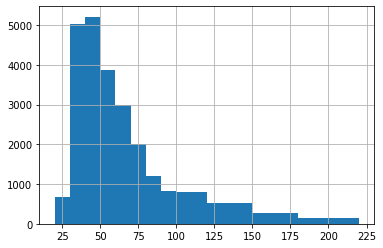

In [48]:
display(data['total_area'])
data['total_area'].unique()
data['total_area'].hist(range=(0,150),bins=[20,30,40,50,60,70,80,90,100,120,150,180,220])

#data['total_area'].median() #52.0
#data['total_area'].mean() #60.3
#data['total_area'].max() #900
#data['total_area'].min() #12

В среднем жилая площадь варьируется от 25 до 70 кв.м.
Максимальные значение 900, а минимальное 12
График похож на экспоненциальное понижение
Среднее = 60,3
Медиана = 52,0

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Последовательно строишь гистограммы по необходимым параметрам

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
30.0
34.457852427601395
409.7
2.0


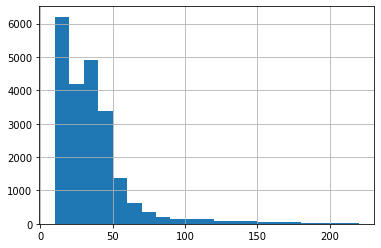

In [49]:
aib = 'living_area'
display(data[aib])
data[aib].unique()
print(data[aib].hist(range=(0,110),bins=[10,20,30,40,50,60,70,80,90,100,120,150,180,220]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2


В среднем жилая площадь варьируется от 
Максимальные значение 409, а минимальное 2 (как так можно??)
График похож на экспоненциальное понижение или распределение Пуассона

Среднее = 34,5
Медиана = 30
Разброс здесь ниже
А у дома(-ов) по 900 + кв. метров около половины площади "не живая"

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И небольшие всплески похоже связаны с комнатностью

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
9.1
10.569807198543485
112.0
1.3


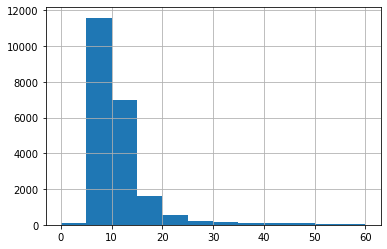

In [50]:
aib = 'kitchen_area'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[0,5,10,15,20,25,30,35,40,50,60]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

У кого-то в кухне помещается 1 плита и то с трудом...., но в среднем по кухне можно погулять, целых 10 кв. метров! А кто-то устраивает ресторан в 1 жилое помещение 100 квадратов

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Обычно кухни небольших размеров

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
4650000.0
6541553.400860796
763000000.0
121900.0


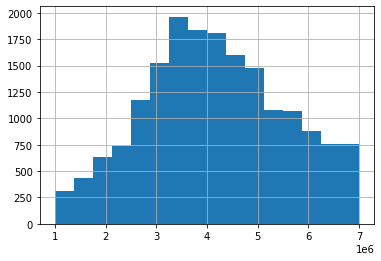

In [51]:
aib = 'last_price'
display(data[aib])
print(data[aib].hist(bins=16, range= (1000000,7000000)))#№,bins=[0,5,10,15,20,25,30,35,40,50,60]))

print(data[aib].median()) #4650000.0
print(data[aib].mean()) #6541548.771551542
print(data[aib].max()) #763000000.0
print(data[aib].min()) #12190.0

Половина стоимости квартир не дорогая, всего около 2-х месячных зарплат ректора Финансового университета, а с медианой надо целый квартал экономить)

Ну а за 12 тысяч можно и в 2-х квадратах пожить, если недалеко от метро...

А 763 миллиона кухня-ресторан звучит неплохо

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> На цену 12190 все же стоит посмотреть чуть детальнее, она не очень похожа на правду)  </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> И для самих цен лучше построить именно гистограмму, сейчас график читается тяжеловато </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Построил</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично!

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
2.0
2.070635891809781
19
0


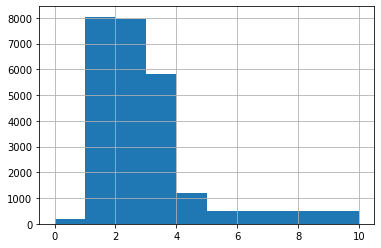

In [52]:
aib = 'rooms'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[0,1,2,3,4,5,10]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

У кого-то вообще нет комнат, ну а в среднем хотя-бы 2 у всех имеются и это замечательно!

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Могу посоветовать посмотреть данные материалы, чтобы научиться оформлять графики еще лучше:

[Здесь](https://pyprog.pro/mpl/mpl_title.html)
  
[И здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html)
    
[И вот тут](https://www.python-graph-gallery.com)
    
   

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
2.65
2.7288141202426917
14.0
1.0


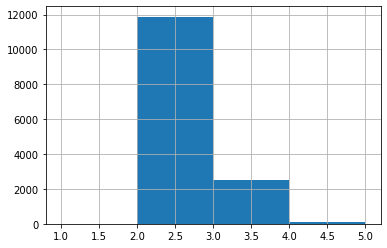

In [53]:
aib = 'ceiling_height'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[1,2,3,4,5]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

В среднем помещаюсь я и еще 70 сантиметров, маленького ребёнка таскать можно)
14 метров максимадьно: 2 варианта 1) человек перепутал( я изменял только те потолки где более 15 метров. так как >1,5 метра не может быть), 2е он живёт в Загсе

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо, но все же минимальные и максимальные значения пожалуй стоит доработать)

<div class="alert alert-info"> <b>Комментарий студента:</b> Хотите сказать диапозон потолков 1,4-10?</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Все так, только они сейчас 1 и 14)
    
   

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
4.0
5.892358327355584
33
1


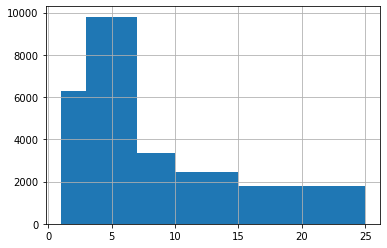

In [54]:
aib = 'floor'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[1,3,7,10,15,25]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

В среднем мы на 4-м - 6-м этаже, а бывают и 33

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В основном застройка низкоэтажная

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: type_floor, Length: 23699, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


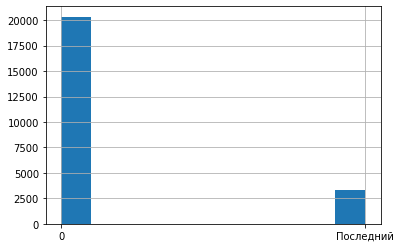

In [55]:
aib = 'type_floor'
display(data[aib])
data[aib].unique()
print(data[aib].hist())

#print(data[aib].median()) #30.0
#print(data[aib].mean()) #34.5
#print(data[aib].max()) #409
#print(data[aib].min()) #2

Последних чуть больше, ну а других много

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Логично

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
9.0
10.638718933288324
60
1


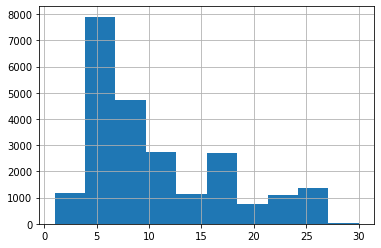

In [56]:
aib = 'floors_total'
display(data[aib])
data[aib].unique()
print(data[aib].hist(range=(1,30)))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

Интересно, что в среднем мы проживаем по середине дома, так как среднее и медианное, даже максимальное отличается в 2 раза!

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Тут хорошо бы доработать bins и range </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Так выглядит лучше</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Верно, но пик на 9 сейчас не очень нагляден пока что) Тут еще можно доработаь figsize

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
13098.5
14191.277832783278
65968.0
181.0


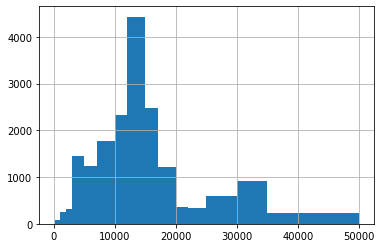

In [57]:
aib = 'cityCenters_nearest'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[100,1000,2000,3000,5000,7000,10000,12000,15000,17000,20000,22000,25000,30000,35000,50000]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

Вот ты и попалось! Скошенное распределение! Кому-то до города 60 км, ошибка в данных?

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Чаще всего квартира не дальше 20 км от центра, а на максимум стоит посмотреть отдельно)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
26726.0
28793.67219254282
84869.0
0.0


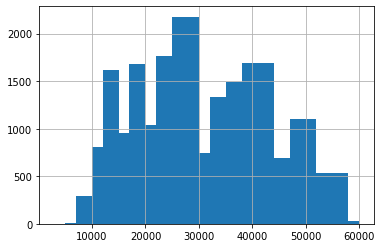

In [58]:
aib = 'airports_nearest'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[3000,5000,7000,10000,12000,15000,17000,20000,22000,25000,30000,32000,35000,38000,44000,47000,52000,58000,60000]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

Оказывается есть дома - прямо интегрированные в аэропорт!

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И их стоило обработать в "предобработке"

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
455.0
490.80455501918556
3190.0
1.0


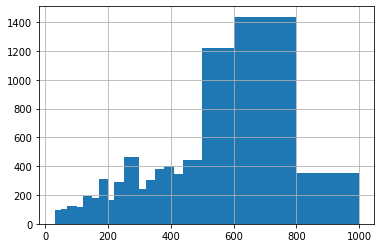

In [59]:
aib = 'parks_nearest'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[30,50,70,100,120,150,170,200,220,250,300,320,350,380,410,440,470,500,600,800,1000]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

парки очень близки! 0,5 км и ты на свежем воздухе!

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все параметры удаленности разобраны

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
6.0
6.400101270095784


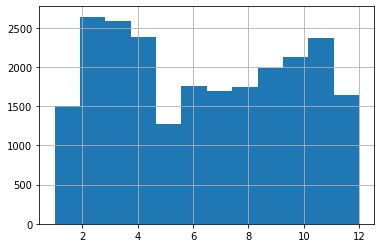

In [60]:
aib = 'month'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=12))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5

Январские майские и декабрьские праздники! Не до обьявлений!

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: week_day, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
3.0
2.5693067218026076


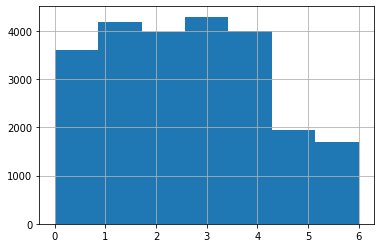

In [61]:
aib = 'week_day'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=7))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И временные показатели также проанализированы

В субботу и воскресенье все отдыхают, ничего не публикуют. отдых тоже нужен!)

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
95.0
180.88863436982163
1580.0
1.0
Долгосрочники средняя:  8876492.775320139
Малосрочники средняя:  6152120.156416908
Долгосрочники медиана:  5600000.0
Малосрочники медиана:  4500000.0
Значение p 1.1775709460217121e-08
Нулевая гипотеза не права, они в среднем не дороже


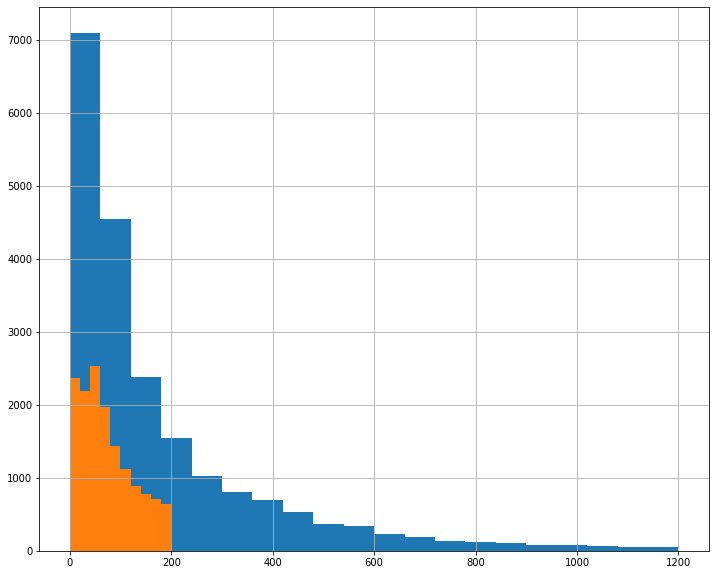

In [62]:
from scipy import stats as st
#Перейдём к продолжительности продажи
aib = 'days_exposition'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=20, range=(0,1200)))


print(data[aib].hist(bins=10, range=(0,200),figsize=(12,10)))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #1

dolgo = data[data[aib] > 700]
korotko = data[data[aib] < 700]

print("Долгосрочники средняя: ", dolgo['last_price'].mean())
print("Малосрочники средняя: ", korotko['last_price'].mean())

print("Долгосрочники медиана: ", dolgo['last_price'].median())
print("Малосрочники медиана: ", korotko['last_price'].median())

result = st.ttest_ind(dolgo['last_price'], korotko['last_price'], equal_var=False)
alpha = 0.01
print("Значение p",result.pvalue)
if result.pvalue > alpha:
    print('Нулевая гипотеза права, они в среднем дороже')
else:
    print('Нулевая гипотеза не права, они в среднем не дороже')

В среднем люди продают квартиры по полгода, но половина объявлений продана за 3 квартала. Это все из-за квартир, которые не продавались очень долго ( некотороые более 4-х лет!). 

Также можно заметить, что квартиры, продающиеся более 2-х лет, стоят дороже на 1-2 миллиона рублей. Проверим это на статистике 

H0 -> цены не различаются

Н1 -> цены различаются

По уровню значимости a=0.01 делаем вывод, что цены различаются

Похоже на Пуасоновское распределение 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично установил границы days_exposition

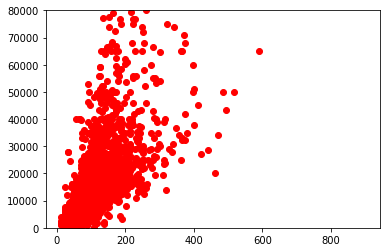

In [63]:
data['price_1000'] = data['last_price'] / 1000

#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'total_area'
price = 'price_1000'

#print(data.plot(x=pokazat, y=price, kind ='hist'))
plt.plot(data[pokazat], data[price], 'ro')
plt.ylim(0,80000)
plt.show()

Делю на 1000, чтобы помещались цифры. 
Корреляция между полной площадь и ценой достаточно высокая

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Диаграмма рассеяния наиболее подходящий график для анализа зависимости от площадей

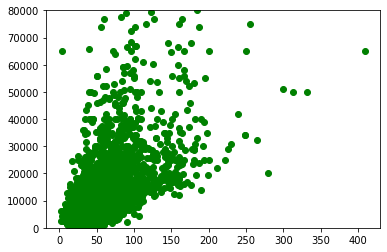

In [64]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'living_area'
price = 'price_1000'

#print(data.plot(x=pokazat, y=price, kind ='hist'))
plt.plot(data[pokazat], data[price], 'ro', color= 'green')
plt.ylim(0,80000)
plt.show()

Корреляция между жилой площадью более высокая

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо

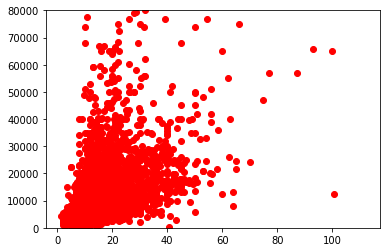

In [65]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'kitchen_area'
price = 'price_1000'

#print(data.plot(x=pokazat, y=price, kind ='hist'))
plt.plot(data[pokazat], data[price], 'ro')
plt.ylim(0,80000)
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> От кухни зависимость кажется чуть пониже

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе изучения зависимости от комнат и площадей стоит добавить анализ корреляции Пирсона, чтобы точнее понять наличие/отсутствие линейной зависимости

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Корреляция пока что не добавлена. Не считаю, что только из-за одного этого замечания стоит отправлять проект на доработку еще раз, но обрати внимание, что ее стоит перепроверить при помощи corr

AxesSubplot(0.125,0.125;0.775x0.755)


,price_1000
rooms,
0,2450.0
1,3350.0
2,5196.0
3,13000.0
4,4050.0
5,15500.0
6,11795.0
7,65000.0
8,16500.0


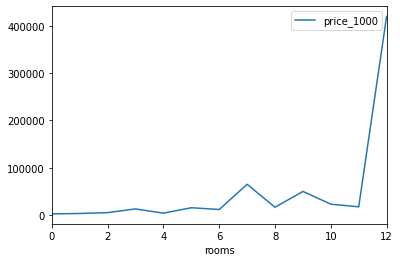

In [72]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'rooms'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='first')

print(new_data.plot(xlim=(0,12)))
new_data

В среднем цены растут, иног

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> А вот тут и далее диаграмма рассеяния не подойдет, она покажет только частотность распределения и не укажет напрямую на зависимость параметров. Для комнат и всех следующих параметров стоит построить линейные или столбчатые графики по средним или медианам

<div class="alert alert-info"> <b>Комментарий студента:</b> Да, действительно выглядит намного лучше! В прошлый раз почему-то не получилось построить. Выглядит страшно</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Хорошо, только чуть лучше было бы здесь ограничить выброс на 12 км

Небольшая корреляция есть)

Я бы сказал корреляция очень небольшая)

AxesSubplot(0.125,0.125;0.775x0.755)


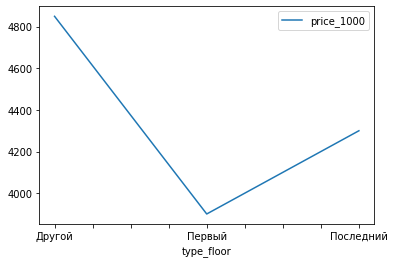

In [88]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'type_floor'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

На 1-м всё же дешевле, чем на остальных и на последнем)

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> На самом деле все же первый тут заметно ниже)

Обновленно, все живут везде! Не особо важно какой тип этажа!

AxesSubplot(0.125,0.125;0.775x0.755)


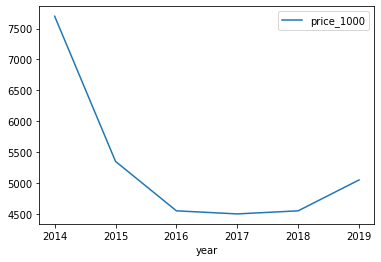

In [87]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'year'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

Неожиданно но факт, цены уменьшаются! Ну после кризиса...

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо

AxesSubplot(0.125,0.125;0.775x0.755)


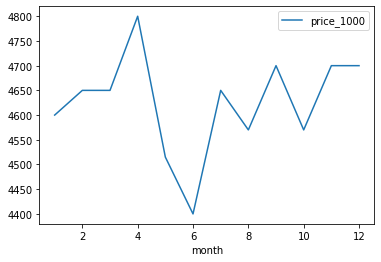

In [86]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'month'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

Цены к лету падают (я про эту зависимость даже где-то слышал)

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Всё корректно

AxesSubplot(0.125,0.125;0.775x0.755)


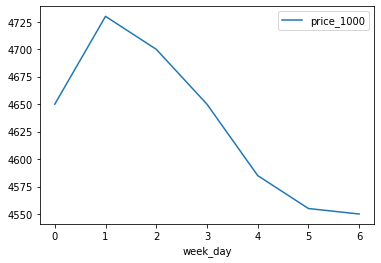

In [85]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'week_day'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

В субботу - воскресенье дешевле, а во вторник самые дорогие

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> К выходным цены падают

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> После исправления графиков поправь пожалуйста выводы)

In [76]:
#обьявления
data_by_country = data.groupby('locality_name').agg(avg_price=('price/metr','mean'), count=('last_price','count'))
data_by_country.sort_values(by='count', ascending=False).head(10)

,avg_price,count
locality_name,,
Санкт-Петербург,114849.072817,15721
посёлок Мурино,85752.189195,522
посёлок Шушары,78677.364217,440
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
посёлок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


Как и ожидалось Питер самый дорогой, но остальные не так сильно и отстают!

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Ты правильно ответил на вопрос задания!

<AxesSubplot:xlabel='km'>

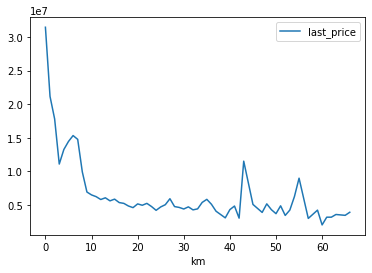

In [78]:
#SPB
'''data_by_SPB = data[data['locality_name'] == 'Санкт-Петербург']
new_data = data_by_SPB['last_price']/data_by_SPB['km']
print(new_data.sum()/new_data.count())
print(new_data.sum())
print(new_data.count())
#new'''

new_data = data.pivot_table(index='km',values='last_price',aggfunc='mean')
new_data.plot()


Видно быстрое уменьшение цены, сначало резкое потом плавное и остановка.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Немного не то. По заданию нужно было посчитать средние цены именно по каждому километру. Тут правильно будет построить таблицу или график, взяв пивот с индексом в километрах и в значениях last_price

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Сейчас все отобразил как надо

Каждый километр до города стоит дороже, чем 9 кв. метр в самом доме

### Общий вывод

Было исправленно очень много человеческих(например потолок 25 метров, на 2.5)

Были сделаны следующие выводы:
1) На основании статистического анализа было выявлено, что чем дороже квартира, тем дольше она продаётся

2) Средняя цена километра отдаленности от центра 1,5 миллиона

3) В воскресенье выставляется мало обьявлений и большой разброс. Также, мало обьявлений выставляется в мае, январе и декабре

4) Стоимость больше всего коррелирует с площадью дома

5) Потолки в среднем около 2,5 метров

6) Виден очень большой разброс в цене, количесве квадратных метров жилой и нежилой площади

7) В среднем все живут на 4-6 этажах, а первый этаж не особо любят богачи или он предназначен для другого помещения

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Супер, подробные и хорошие выводы

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Булат, проект отличный! У тебя очень сильные аналитические навыки и владение инструментами для проведения исследования. Но всё же в проекте есть несколько замечаний и я попрошу тебя исправить их, чтобы он стал еще лучше! </div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

Можете побыстрее проверить, пожалуйста, тороплюсь к финальному испытанию на следующем спринте! 